In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

# Exercise 1

## Exercise 01.1

1. We provide an estimate of the integral $\langle r \rangle = \int_0^1 r dr = 1/2$ using the Pseudo-Random Number Generator and data blocking with 100 blocks of 100 steps each.

In [2]:
filepath='Ex_1_1/OUTPUT/outFile1.txt'

ave=np.loadtxt(filepath, usecols = (1, ))
err=np.loadtxt(filepath, usecols = (2, ))

x=np.arange(100)

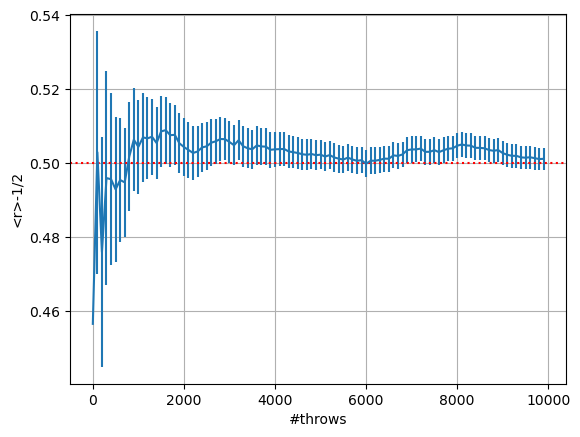

In [3]:
plt.errorbar(x*100, ave, yerr=err)
plt.axhline(1/2, linestyle='dotted', color='r')
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

- The graph above shows the moving average corresponding to the estimate of the integral value as a function of the number of "throws" (i.e. single number generations) along with its statistical uncertainty, made using data blocking.

2. We provide an estimate of the variance of the integral above: $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$ using the Pseudo-Random Number Generator and data blocking (100 blocks of 100 steps).

In [4]:
filepath='Ex_1_1/OUTPUT/outFile2.txt'

ave=np.loadtxt(filepath, usecols = (1, ))
err=np.loadtxt(filepath, usecols = (2, ))

x=np.arange(100)+1

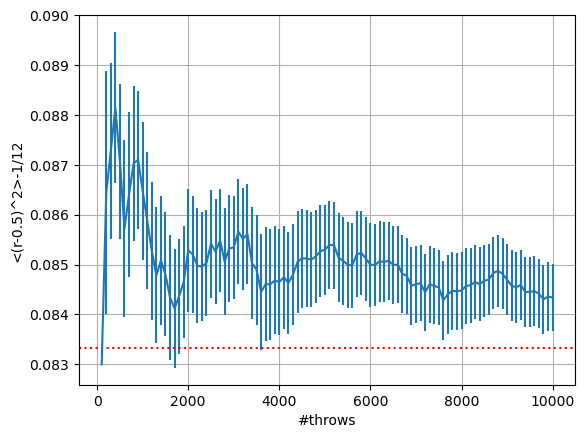

In [5]:
plt.errorbar(x*100, ave, yerr=err)
plt.axhline(1/12, linestyle='dotted', color='r')
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

3. $\chi^2$

Pearson's cumulative test statistic $\chi^2$ is a measure of the error between observations, $O_i$, and expected values, $E_i$:
$$\chi^2 = \sum_{i} \frac{\left( O_i - E_i \right)^2}{E_i}$$
We will use the $\chi^2$ to test if the hypothesis that the numbers $r$ are drawn from a uniform distribution is **false**.

We divide [0,1] into $M$ identical sub-intervals and implement the $\chi^2$ test. The number of expected events observed in each sub-interval after $n$ throws, according to a uniform distribution, is $np=n/M$.
We fix $M=102$ and use for $n$ the first 1000 pseudo-random numbers, then the successive 1000 pseudo-random numbers, and so on ... 100 times.

We the plot the value of $\chi_j^2$ for $j=1,...,100$.

In [6]:
filepath='Ex_1_1/OUTPUT/outFile3.txt'

chi2=np.loadtxt(filepath, usecols = (0, ))
chi2_reduced=chi2/100   # where 100 is the number of subintervals

Nblocks=chi2.size
x=np.arange(0, Nblocks)+1

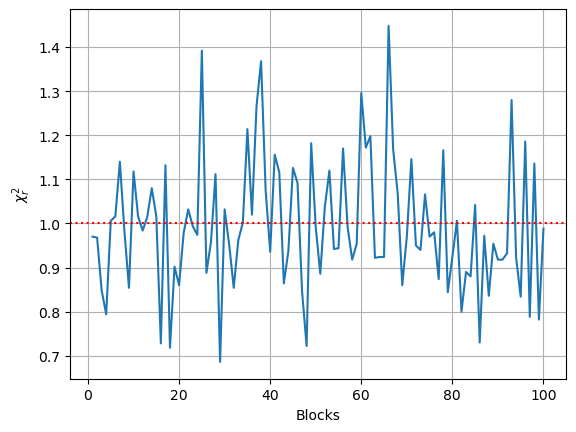

In [7]:
plt.plot(x, chi2_reduced)
plt.axhline(1, linestyle='dotted', color='r')
plt.xlabel('Blocks')
plt.ylabel('$\chi^2_r$')
plt.grid(True)
plt.show()

The average value of $\chi^2_r$ is:

In [12]:
chi2r_ave=np.sum(chi2_reduced)/chi2_reduced.size
print('chi^2_r = ', chi2r_ave)

chi^2_r =  0.9944399999999999


The value obtained is compatible with the value expected for $\chi^2_r=\chi^2/100$, as on average we expect that $(n_i - n/M)^2 \simeq n/M$ and thus $\chi^2 \simeq 100$, i.e. the number of sub-intervals.

## Exercise 01.2

First I include the possibility to sample from an exponential and a Cauchy-Lorentz distribution.
To achieve that, I use the method of the inversion of the cumulative distribution.

If $p(x)$ is the distribution we need to sample, its cumulative distribution is:
$$
F(x)=\int_{-\inf}^x p(t)dt
$$
Then we can sample from $p(x)$ with:
$$
x=F^{-1}(y)
$$
where $y\sim Unif(0,1]$

- **Exponential** distribution $p(x)=\lambda e^{-\lambda x}$:

The cumulative distribution is $F(x)=1-e^{-\lambda x}$
with inverse $x=-\frac{1}{\lambda}ln(1-F(y))$

- **Cauchy-Lorentz** distribution $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2-\Gamma^2}$:

The cumulative distribution is $F(x)=\frac{1}{\pi}arctan(\frac{x-\mu}{\Gamma}) +\frac{1}{2}$
with inverse $x=\mu +\Gamma tan\left[ \pi(F(x)-\frac{1}{2}) \right]$

For this exercise we will use the distributions described above to provide a visual "proof" of the Central Limit Theorem (CLT), according to which the distribution of the mean of a large number of independent variables will converge to a normal distribution, regardless of probability distribution they came from, as long as its variance is finite.

For uniform, exponential and Cauchy distributions, 10000 values of $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ with $N=1,2,10,100$ have been extracted and used to realize the following histograms.

In [8]:
filepath='Ex_1_2/OUTPUT/outFile1_2.txt'

data=np.loadtxt(filepath, usecols = (0,1,2,3,4,5,6,7,8,9,10,11))

Nblocks=data[:,0].size
Nthrows=[1, 2, 10, 100]   # number of throws in each block

In [19]:
#set mean and sigma
mu=[0.5,1,0]
sigma=[math.sqrt((1/12)), math.sqrt(1), 1]
# normal distribution
def normal(x, mu, sigma):
    return (1/(sigma*math.sqrt(2*np.pi)))*np.exp(-0.5*((x-mu)/sigma)**2)

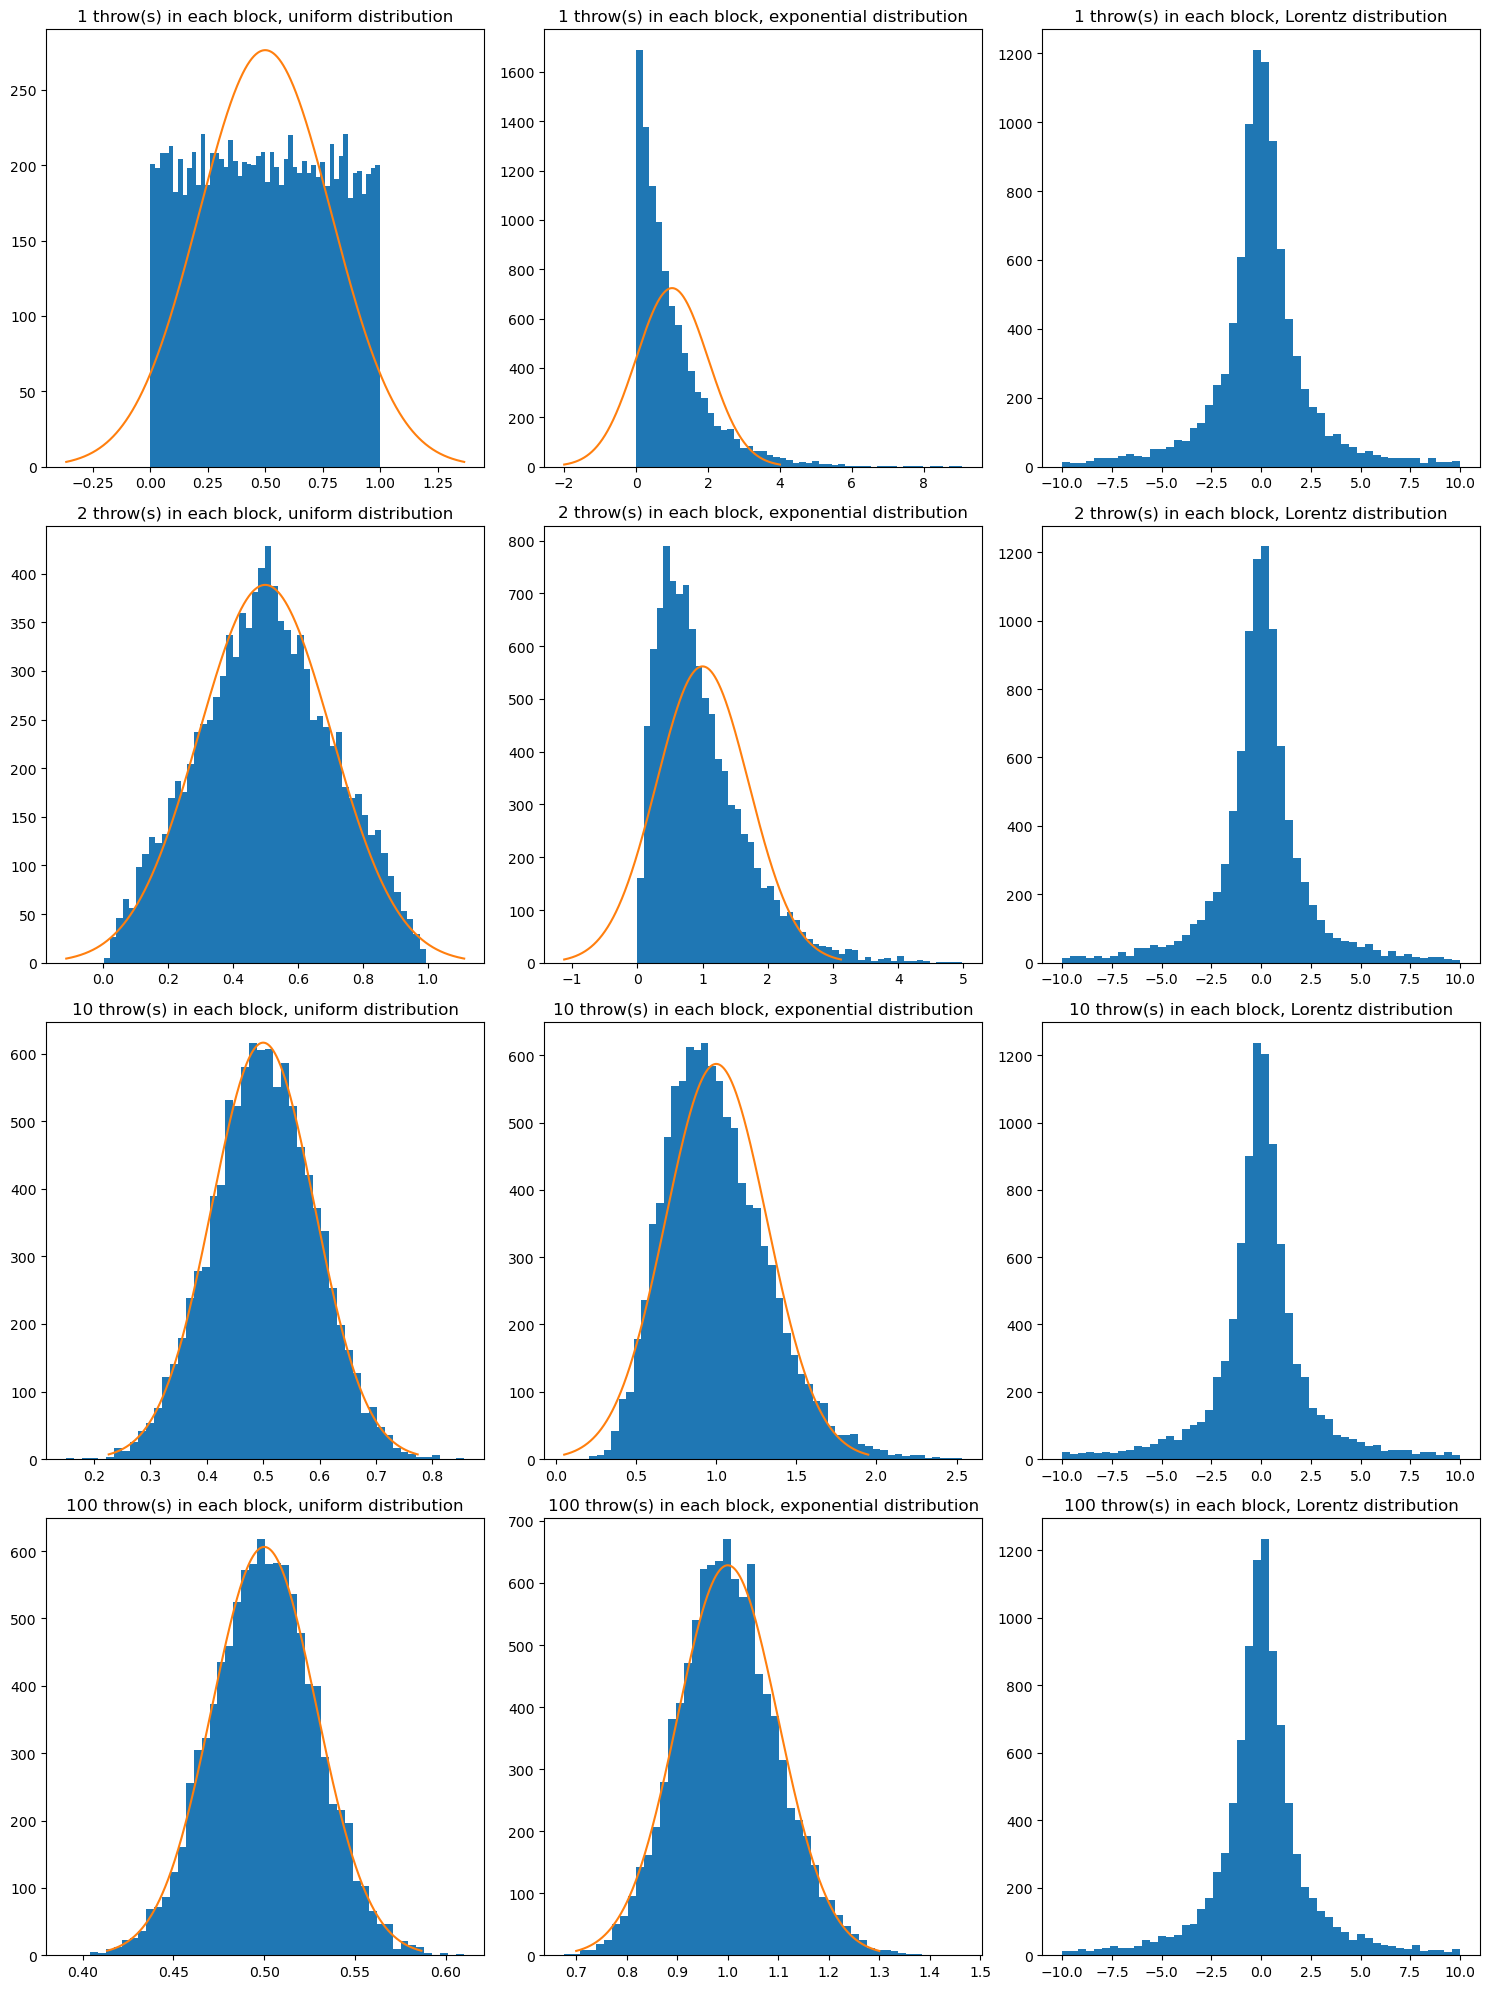

In [243]:
nbins= 50
fig, axs = plt.subplots(4, 3, sharey=False, tight_layout=True, figsize=(15, 20))
#fig.suptitle("Central Limit Theorem", size=32)
data_distr=["uniform", "exponential", "Lorentz"]

for k in range(4):
    for i in range(3):
        
        if(i==2):   # lorentz distribution does not satisfy CLT hypotheses
            histo=axs[k,i].hist((data[:,3*k +i]),range=(-10, 10), bins=nbins)
        else:     # uniform and exponential distributions satisfy CLT hypotheses
            histo=axs[k,i].hist((data[:,3*k +i]), bins=nbins)

            pos = np.linspace(mu[i] - 3*sigma[i]/math.sqrt(Nthrows[k]), mu[i] + 3*sigma[i]/math.sqrt(Nthrows[k]), 1000)
            expected= normal(pos, mu[i], sigma[i]/math.sqrt(Nthrows[k]))
            binwidth=histo[1][1]-histo[1][0]
            scale=Nblocks*binwidth

            axs[k,i].plot(pos, scale*expected) # plot expected gaussian curve according to CLT
            
        axs[k,i].set_title(str(Nthrows[k]) + " throw(s) in each block, " + data_distr[i] + " distribution")

plt.show()

We can clearly see how the uniform and exponential distributions quickly converge to a normal distribution, as shown by the normal function fit above the histograms.
However, the variance of the Lorentz-Cauchy distribution is not finite and therefore does not fit the hypotheses under which the CLT is valid.

## Exercise 01.3

This section is dedicated to using Buffon's experiment to calculate an estimate of $\pi$.

- **Buffon's experiment**:
A needle of length $L$ is thrown at random onto a horizontal plane ruled with straight lines a distance $d$ (must be $d > L$, but not $d\gg L$ otherwise $P\ll 1$) apart. The probability $P$ that the needle will intersect one of these lines is: $P = 2L/\pi d$. This could be used to evaluate $\pi$ from throws of the needle: if the needle is thrown down $N_{thr}$ times and is observed to land on a line $N_{hit}$ of those times, we can make an estimate of $\pi$ from
$$\pi = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

SETTING:
- Assume distance between parallel lines (their intersections with horizontal axis / x axis) is d = 1
- Problem is invariant in the vertical dimension (the one parallel to the lines)
- It is also periodic in the horizontal dimension
   What matters is whether the projection of the needle along the horizontal axis crosses the boundaries of a "cell" (i.e. the space between lines)

APPROACH:
- I generate a random horizontal coordinate between 0 and 1 for one extreme of the needle, exploiting the periodicity along the horizzontal dimension (can be viewed as implementation of Periodic Boundary Conditions)
- I generate a random angle $[0,2\pi)$ and with it I extract the horizontal projection of the needle
   -If this projection crosses the boundaries of the unit cell, I update a "counter" variable
   
100 blocks of 1000 throws each are used.

In [9]:
filepath='Ex_1_3/OUTPUT/outFile1.txt'

pi=np.loadtxt(filepath, usecols = (1))
pi_error=np.loadtxt(filepath, usecols=2)

Nblocks=pi.size
blocks=np.arange(0,Nblocks)+1

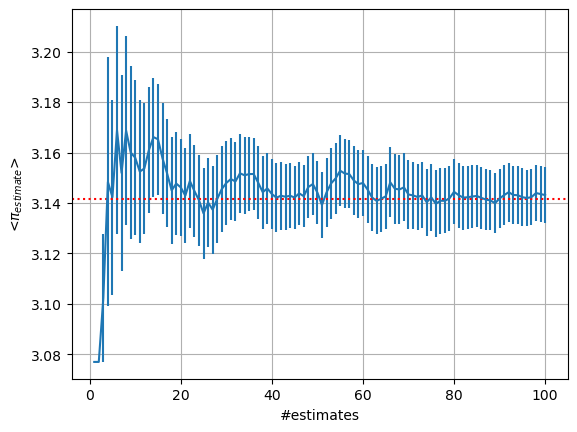

In [10]:
plt.errorbar(blocks, pi, yerr=pi_error)
plt.axhline(np.pi, linestyle='dotted', color='r')
plt.xlabel('#estimates')
plt.ylabel('<$\pi_{estimate}$>')
plt.grid(True)
plt.show()